In [12]:
import sys
import math

import pylab
from astropy.io import fits
from astropy.utils.data import download_file
import numpy as np

In [9]:
def waterfallize(signal, bins):
    window = 0.5 * (1.0 - np.cos((2 * math.pi * np.arange(bins)) / bins))
    segment = bins / 2
    nsegments = int(len(signal) / segment)
    m = np.repeat(np.reshape(signal[0:segment * nsegments], (nsegments, segment)), 2, axis=0)
    t = np.reshape(m[1:len(m) - 1], (nsegments - 1, bins))
    img = np.multiply(t, window)
    wf = np.log(np.abs(np.fft.fft(img)))
    return np.concatenate((wf[:, bins / 2:bins], wf[:, 0:bins / 2]), axis=1)

def waterfall(signal, sample_rate=None, bins = 4096 ):
    waterfall = waterfallize(signal, bins)
    waterfall[np.isneginf(waterfall)] = np.nan
    wmin, wmax = np.nanmin(waterfall), np.nanmax(waterfall)
#    waterfall = ((waterfall - wmin) / (wmax - wmin)) * 5.5 - 4.5
#    waterfall = cm.map(waterfall)
    return waterfall

In [10]:
import dateutil.parser
from matplotlib import dates
import datetime

raw_files = []
raw_files.append([download_file('http://space.astro.cz/bolidozor/nachodsko/NACHODSKO-R3/meteors/2016/05/20/01/20160520011752889_NACHODSKO-R3_raws.fits', cache=True ),'NACHODSKO-R3'])
raw_files.append([download_file('http://space.astro.cz/bolidozor/OBSUPICE/OBSUPICE-R4/meteors/2016/05/20/01/20160520011813222_OBSUPICE-R3_raws.fits', cache=True ),'OBSUPICE-R4'])
#raw_files.append([download_file('http://space.astro.cz/bolidozor/ZVPP/ZVPP-R2/meteors/2015/03/15/19/20150315194408977_ZVPP-R2_raws.fits', cache=True ),'ZVPP-R2'])
#raw_files.append([download_file('http://space.astro.cz/bolidozor/svakov/SVAKOV-R6/meteors/2015/03/15/19/20150315194355315_SVAKOV-R6_raws.fits', cache=True ),'SVAKOV-R6'])
#raw_files.append([download_file('http://space.astro.cz/bolidozor/uFlu/uFlu-R1/meteors/2015/03/15/19/20150315194418800_uFlu-R1_raws.fits', cache=True ),'uFlu-R1'])

/opt/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/opt/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


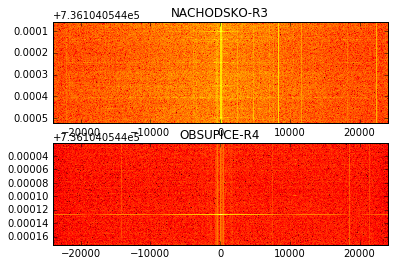

In [13]:
%matplotlib inline

f = pylab.figure()
for n, fname in enumerate(raw_files):
    hdu_list = fits.open(fname[0])
    image_data = hdu_list[0].data
    flat_data = np.ravel(image_data)
    hdu = hdu_list[0]
    d1 = dateutil.parser.parse(hdu.header['DATE'])
    fds1 = dates.date2num(d1) # converted
    d2 = d1 + datetime.timedelta(seconds=hdu.header['NAXIS2']/48000.0)
    fds2 = dates.date2num(d2) # converted
    arr = waterfall(flat_data[0::2] + 1j * flat_data[1::2], 48000)
    f.add_subplot(2, 1, n + 1)  # this line outputs images on top of each other
#    f.add_subplot(1, len(raw_files), n)  # this line outputs images side-by-side
    pylab.imshow(arr,  interpolation='nearest', aspect='auto',  extent=[-24000, 24000, fds2, fds1])
#    pylab.xlim(10000,11000)
#    pylab.ylim(735672.82209, 735672.8230)
#    pylab.set_cmap('gist_ncar')
    pylab.set_cmap('hot')
    pylab.title(fname[1])
pylab.show()


In [9]:
len(raw_files)

2